### Diplomado en Ciencia de Datos UNAM 
### Modulo 3: Estadística para ciencia de datos 
### Dr. Roberto Bárcenas C. 
### Alumno: Ibarra Ramírez Sergio
### Practca 1

El conjunto de datos 'Birthweight' contiene la información de 42 bebés al nacer. La pregunta de 
investigación es saber si existe una relación entre al peso al nacer y el tiempo de gestación. La variable 
dependiente es Peso al nacer (dada en libras) y la variable independiente para esta actividad es la edad 
gestacional del bebé al nacer (en semanas).

#### a) Realiza una descripción gráfica y de medidas estadísticas (descriptivas) de los datos.

Debemos antes que todo, importar los datos de Birthweight

In [2]:
import pandas as pd

data_Birthweight_path = "Birthweight.csv"


# Read the CSV file into a DataFrame
data_Birthweight = pd.read_csv(data_Birthweight_path)

# Print the DataFrame
print(data_Birthweight.head(7))


   ID  Gestation  Birthweight
0   1         44         4.55
1   2         40         4.32
2   3         41         4.10
3   4         44         4.07
4   5         42         3.94
5   6         38         3.93
6   7         40         3.77


Demos una "vista resumen " a nuestros datos

In [8]:
summary_Birthweight = data_Birthweight.describe()
print(summary_Birthweight)


              ID  Gestation  Birthweight
count  42.000000  42.000000    42.000000
mean   21.500000  39.190476     3.312857
std    12.267844   2.643336     0.603895
min     1.000000  33.000000     1.920000
25%    11.250000  38.000000     2.940000
50%    21.500000  39.500000     3.295000
75%    31.750000  41.000000     3.647500
max    42.000000  45.000000     4.570000


In [10]:
import pandas as pd

# Calculate variance
variance = data_Birthweight[['Gestation', 'Birthweight']].var()

# Calculate standard deviation
std_deviation = data_Birthweight[['Gestation', 'Birthweight']].std()

print("Variance:")
print(variance)

print("\nStandard Deviation:")
print(std_deviation)

Variance:
Gestation      6.987224
Birthweight    0.364689
dtype: float64

Standard Deviation:
Gestation      2.643336
Birthweight    0.603895
dtype: float64


Se observa que tenemos 42 datos de Gestation y Birthweight
- Para el caso de Gestation. La media es de 39.1 semanas, casi igual que la mediana (o percentil 59'0) que es de 39.5 semanas. Un valor minimo de 39 y maximo de 45 (Varianza de 6.9 semanas y sd de 2.6)
- Para el caso de Birthweight. La media es de 3.31 kg, casi igual que la mediana (o percentil 59'0) que es de 3.29 kg. Un valor minimo de 1.9 y maximo de 4.5 (Varianza de 0.36 semanas y sd de 0.6)

Utilicemos la libreria de seaborn para generar un gráfico que nos resuma 
1. La relación que existe entre x = "Gestation" & y = "Birthweight"
2. La distribución individual de cada variable x & y 

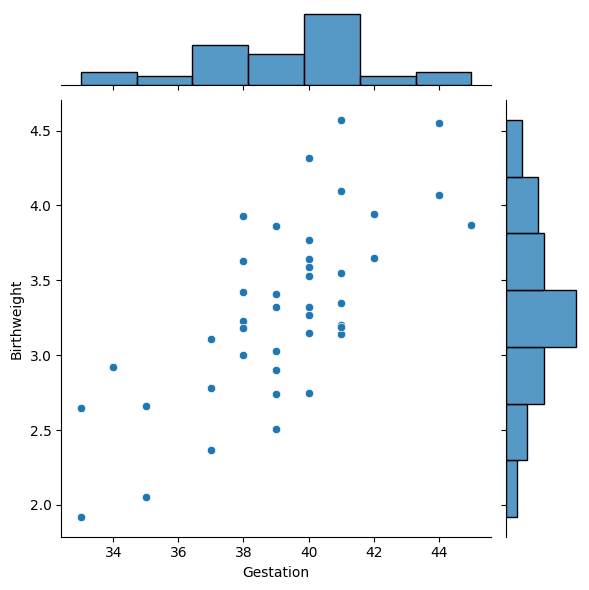

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the DataFrame and variables
df = data_Birthweight
x = "Gestation"
y = "Birthweight"

# Create the scatter plot with histograms
sns.jointplot(x=x, y=y, data=df, kind="scatter")

# Show the plot
plt.show()


Se puede observar una relación "aproxiadamete lineal" positiva de Birthweight como function de Gestation. La variable de Birthweight parece estar "normalmente distribuida" mientras que la variable Gestation parece tener un sesgo a la derecha.
Analisemos con mayor detalle la relación lineal entre ambas variables así como la normalidad de la variable dependiente 

Para el análisis de la relación lineal entre ambas vaiable, determinamos su coeficiente de relacioón de Pearson 

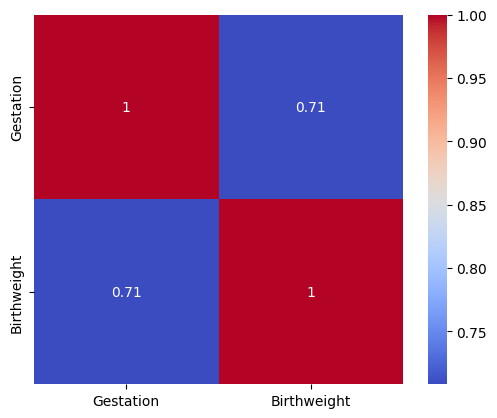

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



selected_columns = data_Birthweight.iloc[:, 1:3]  # Select columns 1 and 2 (indexing starts from 0)
cor_matrix_selected = selected_columns.corr()

sns.heatmap(cor_matrix_selected, annot=True, cmap='coolwarm', square=True)
plt.show()



Se observa que las variables tienen un coeficiente de relación de Person de 0.71. Lo que nos indicaría que el 71% de la varianza de la variable Birthweight puede ser explicada a tráves de su relación lineal con la variable Gestation

#### b) Realiza un análisis de regresión lineal y proporcionar estimadores puntuales de los parámetros

In [11]:
import statsmodels.api as sm

# Fit the linear regression model
X = data_Birthweight['Gestation']
y = data_Birthweight['Birthweight']

X = sm.add_constant(X)  # Add a constant term to the predictor variable
model = sm.GLM(y, X, family=sm.families.Gaussian(link=sm.families.links.identity()))
modelo_lineal_Birthweight = model.fit()

# Print the model summary
print(modelo_lineal_Birthweight.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            Birthweight   No. Observations:                   42
Model:                            GLM   Df Residuals:                       40
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.18627
Method:                          IRLS   Log-Likelihood:                -23.279
Date:                Fri, 19 May 2023   Deviance:                       7.4508
Time:                        11:09:36   Pearson chi2:                     7.45
No. Iterations:                     3   Pseudo R-squ. (CS):             0.6171
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0289      1.002     -3.024      0.0

La ecuación de relación lineal de Birthweight como función de Gestation quedaría: 